## Notebook - Análise das palavras com 5 Letras
***


**Author:** Claudio Vinicius Santos <br>
**Created Date:** 2022-03-28 <br>
**Last Update:** 2022-04-01 <br>
**Last Update Description:** Notebook organization and review.

**Linkedin**: [claudiovosantos](https://linkedin.com/in/claudiovosantos/)<br>
**Github**: [claudioviniciuso](https://github.com/claudioviniciuso)<br>
**Lives Twitch**: [Lives data_Claud](https://www.twitch.tv/data_claudio/about)

***


#### 1. Objetivo Geral:
Análisar todas as palavras com 5 letras disponíveis no Dataset e retirar correlações que possam ajudar na conclusão do jogo TERMO.

#### 2. Fontes e referências:
* Dataset: Banco de Palavras da USP - Link: https://www.ime.usp.br/~pf/dicios/


#### 3. Etapas do Notebook:
* Importação das LIBS
* Importação do Dataset
* Análise prévia e tratativa dos dados
* Modelagem
* Exportação para CSV

### Importação das LIBS
**Pandas** para tratar e visualizar os dados.<br>
**matplotlib** para criar alguns visuais gráficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Importação do Dataset

In [2]:
# Adicionar Dados no Dataframe Pandas
df = pd.read_csv('dic_2.txt', header= None, names=["word"], skiprows=1)

#skyprows igual a 1 por quê a primeira linha do arquivo contém a quantidade de linhas existentes.

### Análise prévia e tratativa dos dados

In [3]:
#Visualização das primeiras linhas
df.head(5)

,word
0,Aarao
1,aba
2,abacate
3,abacateiro
4,abacateiros


In [4]:
#Visualização das últimas linhas
df.tail(5)

,word
245360,zurremos
245361,zurres
245362,zurro
245363,zurros
245364,zurrou


In [6]:
# 1. Colocar todas as letras minúsculo
df['word'] = df['word'].str.lower()
# 2. Adicionar coluna com quantidade de letras na palavra
df['len_word'] = df['word'].str.len()
dfw5 = df[df['len_word'] == 5]
dfw5

,word,len_word
0,aarao,5
10,abaco,5
12,abade,5
18,abafa,5
68,abafe,5
...,...,...
245302,zunis,5
245310,zuniu,5
245314,zurra,5
245355,zurre,5


In [26]:
# Lista onde será armazenado o dafaframe final
list_ = []

# Percorrer todo o dataframe utilizando as funções definidas acima.
for index, row in dfw5.iterrows():
    
    #Definição da palavra
    word = row.word
    
    #Split das letras
    letters = list(word)
    
    #Contar Vogais
   
    list_.append([word,letters[0],letters[1],letters[2],letters[3],letters[4]])

#Definição do Novo Dataset 
dfw5 = pd.DataFrame(list_, columns=["word", 'L1','L2','L3','L4','L5'])
dfw5

,word,L1,L2,L3,L4,L5
0,aarao,a,a,r,a,o
1,abaco,a,b,a,c,o
2,abade,a,b,a,d,e
3,abafa,a,b,a,f,a
4,abafe,a,b,a,f,e
...,...,...,...,...,...,...
5476,zunis,z,u,n,i,s
5477,zuniu,z,u,n,i,u
5478,zurra,z,u,r,r,a
5479,zurre,z,u,r,r,e


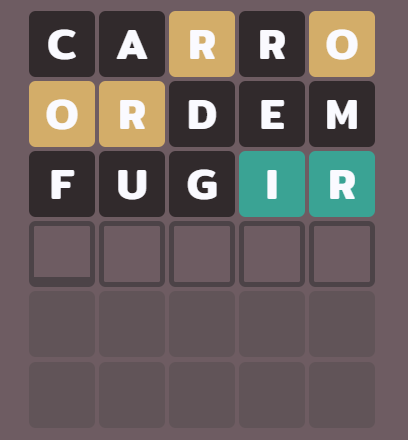

### Observações:

#### Negativas
* **[L_Negativo]**  Não existe [C, A, D, E, M, F, U, G] na palavra
* **[1L_Negativo]** Não existe [O] na 1ª posição
* **[2L_Negativo]** Não existe [R] na 2ª posição
* **[3L_Negativo]** Não existe [R] na 3ª posição
* **[4L_Negativo]** Não existe [] na 4ª posição
* **[5L_Negativo]** Não existe [O] na 5ª posição

#### Positivas
* **[L_Positivo]** Existe [R, O, I] em algum lugar da palavra diferente das posições citadas acima.
* **[1L_Positivo]** Existe [] na 1ª posição
* **[2L_Positivo]** Existe [] na 2ª posição
* **[3L_Positivo]** Existe [] na 3ª posição
* **[4L_Positivo]** Existe [I] na 4ª posição
* **[5L_Positivo]** Existe [R] na 5ª posição

In [89]:
def validar_palavra(df,L_Negativo, L1N, L2N, L3N, L4N, L5N, L_Positivo, L1P, L2P, L3P, L4P, L5P,):
    
    #Lista que vamos armazenar os resultados
    list_result = []
    
    #Loop para analisar todas as palavaras
    for index, row in df.iterrows():
        
        count_LN = 0
        count_L1N = 0
        count_L2N = 0
        count_L3N = 0
        count_L4N = 0
        count_L5N = 0
        
        count_LP = 0
        count_L1P = 0
        count_L2P = 0
        count_L3P = 0
        count_L4P = 0
        count_L5P = 0
        
        #Análise Letra a Letra
        for letra in row.word:
            if letra in L_Negativo:
                count_LN += 1
            
            if letra in L_Positivo:
                count_LP += 1
                
        if row.L1 in L1N: count_L1N +=1                 
        if row.L2 in L2N: count_L2N +=1 
        if row.L3 in L3N: count_L3N +=1
        if row.L4 in L4N: count_L4N +=1             
        if row.L5 in L5N: count_L5N +=1             
       
        if row.L1 in L1P: count_L1P +=1                 
        if row.L2 in L2P: count_L2P +=1 
        if row.L3 in L3P: count_L3P +=1
        if row.L4 in L4P: count_L4P +=1             
        if row.L5 in L5P: count_L5P +=1 
            
            
        TT_N = count_LN + count_L1N + count_L2N + count_L3N + count_L4N + count_L5N
        TT_P = count_LP
        TT_P_Pos = count_L1P + count_L2P + count_L3P + count_L4P + count_L5P
        FL_Positivo = 0
        
        if TT_P  == len(L_Positivo):
            if TT_P_Pos == 0 and TT_P != 0:
                FL_Positivo = 1
            elif TT_P_Pos == 1 and TT_P == len(L_Positivo):
                FL_Positivo = 1

        list_result.append(
            [
                row.word, 
                count_LN, count_L1N, count_L2N, count_L3N,count_L4N,count_L5N, TT_N,
                count_LP, count_L1P, count_L2P, count_L3P,count_L4P,count_L5P, TT_P, TT_P_Pos, FL_Positivo
            ],
                
        )          
    return list_result 

result = validar_palavra(
    dfw5, 
    L_Negativo=['c','a','d','e','m','g', 'f', 'u'], L1N=['o'], L2N=['r'], L3N=['r'], L4N=['r'], L5N=['o'], 
    L_Positivo=['r','o', 'i'], L1P=[] , L2P=[], L3P=[], L4P=['i'], L5P=['r']
)
df = pd.DataFrame(result, columns=['word', 'LN','LN1','LN2', 'L3N', 'L4N', 'L5N', 'TT_N',
                                   'LP','LP1','LP2', 'LP3', 'LP4', 'LP5','TT_P', 'TT_P_Pos', 'FL_Positivo'])
#df
   
    

In [90]:
df_filter = df[df['TT_N'] == 0]
df_filter = df_filter[df_filter['TT_P_Pos'] == 2 ]
df_filter = df_filter.reset_index()

df_filter
#df_filter.loc[0:30]

,index,word,LN,LN1,LN2,L3N,L4N,L5N,TT_N,LP,LP1,LP2,LP3,LP4,LP5,TT_P,TT_P_Pos,FL_Positivo
0,3817,polir,0,0,0,0,0,0,0,3,0,0,0,1,1,3,2,0
1,4873,tinir,0,0,0,0,0,0,0,3,0,0,0,1,1,3,2,0
